In [1]:
# linear algebra
import numpy as np
# data processing
import pandas as pd
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [6]:
import warnings
import itertools
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [8]:
df=pd.read_excel('Sample - Superstore.xls')

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
furniture=df.loc[df['Category']=='Furniture']

In [10]:
furniture.shape

(2121, 21)

In [11]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [12]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [13]:
#Data Preprocessing
cols=['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment',
     'Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category',
     'Product Name','Quantity','Discount','Profit']

In [14]:
furniture.drop(cols,axis=1,inplace=True)

C:\Users\visha\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [15]:
furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [16]:
furniture=furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [17]:
furniture=furniture.set_index('Order Date')

In [18]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [19]:
y=furniture['Sales'].resample('MS').mean()

In [20]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

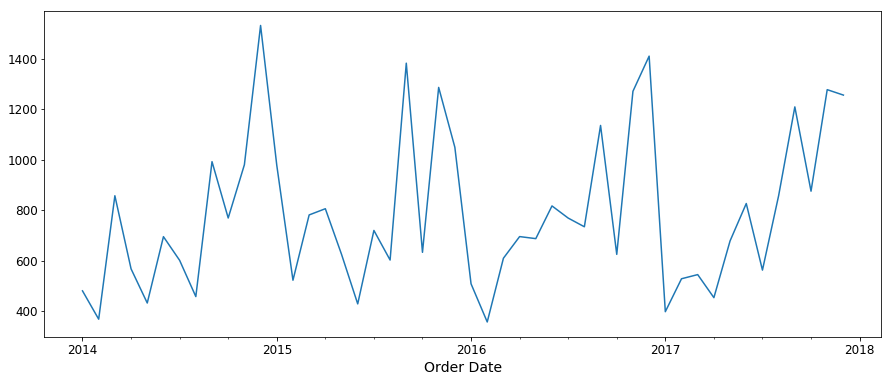

In [21]:
y.plot(figsize=(15,6))
plt.show()


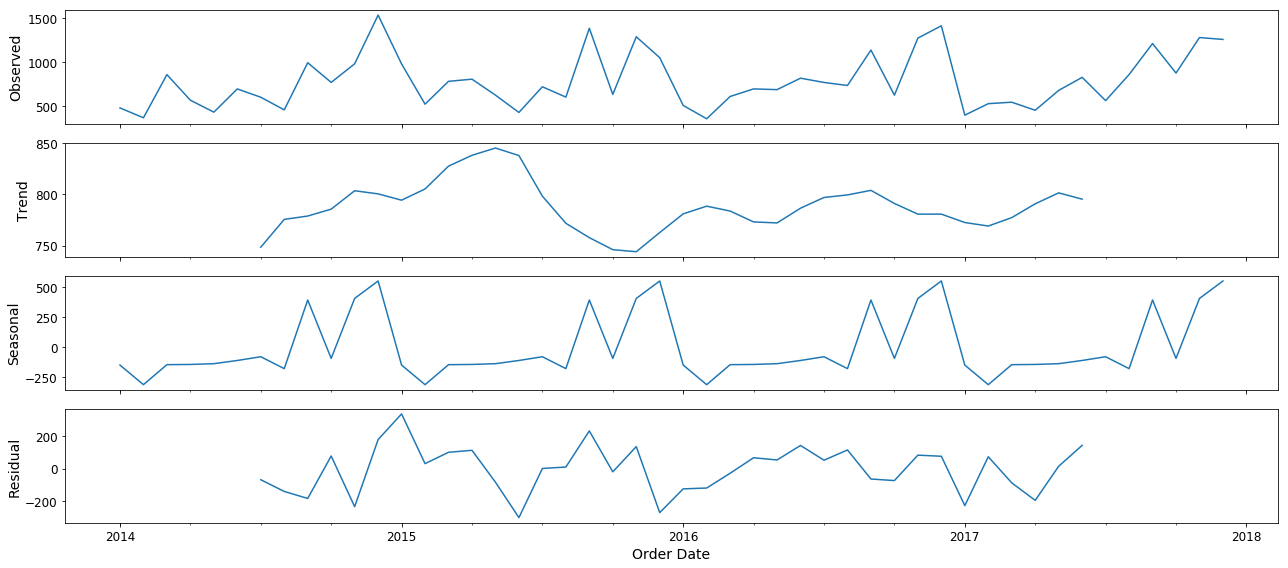

In [22]:
from pylab import rcParams
rcParams['figure.figsize']=18,8

decomposition=sm.tsa.seasonal_decompose(y,model='additive')
fig=decomposition.plot()
plt.show()

In [24]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [25]:
print('Examples of parameter combination for seasonal ARIMA...')
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combination for seasonal ARIMA...
SARIMAX:(0, 0, 1) x (0, 0, 1, 12)
SARIMAX:(0, 0, 1) x (0, 1, 0, 12)
SARIMAX:(0, 1, 0) x (0, 1, 1, 12)
SARIMAX:(0, 1, 0) x (1, 0, 0, 12)


In [31]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,
                                         enforce_stationarity=False,enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12 - AIC {}'.format(param,param_seasonal,result.aic))
        except:
            continue

C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

In [32]:
for param in pdq :
    for param_seasonal in seasonal_pdq :
        try : 
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationarity = False, enforce_invertibility = False)
        
            results = mod.fit()
            print('ARIMA{} x {}12 - AIC{}'.format(param, param_seasonal, results.aic))
        except :
            continue

ARIMA(0, 0, 0) x (0, 0, 0, 12)12 - AIC769.0817523205916
ARIMA(0, 0, 0) x (0, 0, 1, 12)12 - AIC1576.7324642473277
ARIMA(0, 0, 0) x (0, 1, 0, 12)12 - AIC477.71701309202774


C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0) x (1, 0, 0, 12)12 - AIC497.23144334183365
ARIMA(0, 0, 0) x (1, 0, 1, 12)12 - AIC1478.1277236759956
ARIMA(0, 0, 0) x (1, 1, 0, 12)12 - AIC318.0047199116341

C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 1) x (0, 0, 0, 12)12 - AIC720.9252270758104
ARIMA(0, 0, 1) x (0, 0, 1, 12)12 - AIC2786.7230874852653
ARIMA(0, 0, 1) x (0, 1, 0, 12)12 - AIC466.56074298091505


C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1) x (1, 0, 0, 12)12 - AIC499.59412606125284
ARIMA(0, 0, 1) x (1, 0, 1, 12)12 - AIC2768.427220528199
ARIMA(0, 0, 1) x (1, 1, 0, 12)12 - AIC319.98848769468674
ARIMA(0, 1, 0) x (0, 0, 0, 12)12 - AIC677.894766843944


C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0) x (0, 0, 1, 12)12 - AIC1378.5486237111134
ARIMA(0, 1, 0) x (0, 1, 0, 12)12 - AIC486.63785671879367
ARIMA(0, 1, 0) x (1, 0, 0, 12)12 - AIC497.78896630044073


C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0) x (1, 0, 1, 12)12 - AIC1022.8611228052164
ARIMA(0, 1, 0) x (1, 1, 0, 12)12 - AIC319.7714068109211
ARIMA(0, 1, 1) x (0, 0, 0, 12)12 - AIC649.905617681726
ARIMA(0, 1, 1) x (0, 0, 1, 12)12 - AIC3216.0197782079413
ARIMA(0, 1, 1) x (0, 1, 0, 12)12 - AIC458.8705548482984
ARIMA(0, 1, 1) x (1, 0, 0, 12)12 - AIC486.1832977442631


C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1) x (1, 0, 1, 12)12 - AIC2589.717123007444
ARIMA(0, 1, 1) x (1, 1, 0, 12)12 - AIC310.7574368417452
ARIMA(1, 0, 0) x (0, 0, 0, 12)12 - AIC692.1645522067713


C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0) x (0, 0, 1, 12)12 - AIC1450.0255396955233
ARIMA(1, 0, 0) x (0, 1, 0, 12)12 - AIC479.46321478521355
ARIMA(1, 0, 0) x (1, 0, 0, 12)12 - AIC480.92593679351836


C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0) x (1, 0, 1, 12)12 - AIC1352.209230823926
ARIMA(1, 0, 0) x (1, 1, 0, 12)12 - AIC304.46646750845986
ARIMA(1, 0, 1) x (0, 0, 0, 12)12 - AIC665.779444218529


C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1) x (0, 0, 1, 12)12 - AIC2688.1953106578308
ARIMA(1, 0, 1) x (0, 1, 0, 12)12 - AIC468.3685195814159
ARIMA(1, 0, 1) x (1, 0, 0, 12)12 - AIC482.57633238765646


C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1) x (1, 0, 1, 12)12 - AICnan
ARIMA(1, 0, 1) x (1, 1, 0, 12)12 - AIC306.01560022074426
ARIMA(1, 1, 0) x (0, 0, 0, 12)12 - AIC671.2513547541902


C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0) x (0, 0, 1, 12)12 - AIC1455.1241321469415
ARIMA(1, 1, 0) x (0, 1, 0, 12)12 - AIC479.20034222811347
ARIMA(1, 1, 0) x (1, 0, 0, 12)12 - AIC475.34036587849016


C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0) x (1, 0, 1, 12)12 - AIC1356.0287228411075
ARIMA(1, 1, 0) x (1, 1, 0, 12)12 - AIC300.62709013453934
ARIMA(1, 1, 1) x (0, 0, 0, 12)12 - AIC649.0318019835137
ARIMA(1, 1, 1) x (0, 0, 1, 12)12 - AIC21749.90908195544
ARIMA(1, 1, 1) x (0, 1, 0, 12)12 - AIC460.4762687610251
ARIMA(1, 1, 1) x (1, 0, 0, 12)12 - AIC469.5250354660837
ARIMA(1, 1, 1) x (1, 0, 1, 12)12 - AIC2592.9586233250657


C:\Users\visha\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1) x (1, 1, 0, 12)12 - AIC297.787543953291


In [34]:
#fitting the ARIMA model
mod=sm.tsa.statespace.SARIMAX(y,order=(1,1,1),seasonal_order=(1,1,0,12),
                             enforce_stationarity=False,enforce_invertibility=False)
results=mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


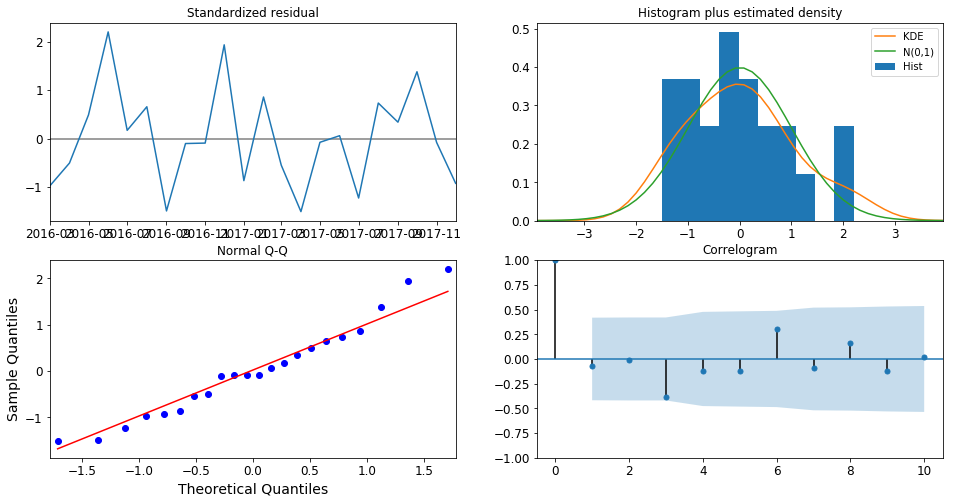

In [35]:
#running model diagonostics using graphs
results.plot_diagnostics(figsize=(16,8))
plt.show()

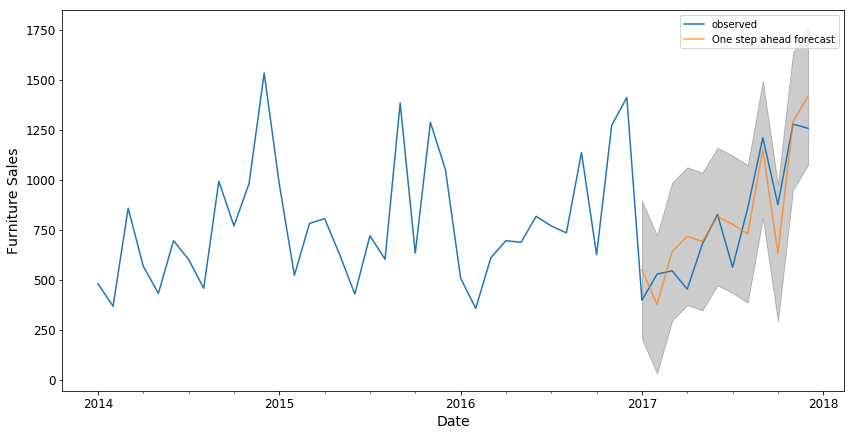

In [38]:
#building validated forecasts
pred=results.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci=pred.conf_int()

ax=y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One step ahead forecast',alpha=0.7,figsize=(14,7))

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color='k',alpha=0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()
